In [53]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt


In [4]:
ds=pd.read_csv(r"C:\Users\sojwa\Downloads\archive\Position_Salaries.csv")

In [7]:
ds

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [9]:
ds.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


In [11]:
ds.corr()

,Level,Salary
Level,1.000000,0.817949
Salary,0.817949,1.000000


<AxesSubplot:>

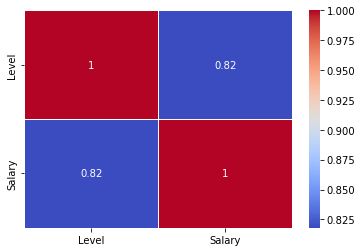

In [12]:
sb.heatmap(ds.corr(), annot=True , cmap='coolwarm', linewidth=0.5)

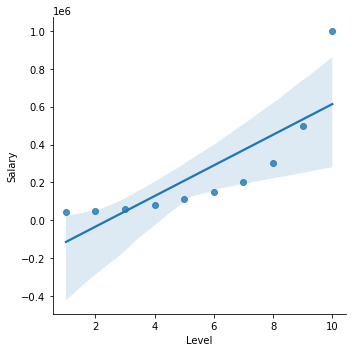

In [13]:
sb.lmplot(x='Level',y='Salary',data=ds)

In [15]:
ds.isnull()

,Position,Level,Salary
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
5,False,False,False
6,False,False,False
7,False,False,False
8,False,False,False
9,False,False,False


In [16]:
ds.isnull().sum()

Position    0
Level       0
Salary      0
dtype: int64

In [27]:
from sklearn.linear_model import LinearRegression


In [31]:
model=LinearRegression()

In [33]:
x=ds.iloc[:,1:2]

In [40]:
x

,Level
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [42]:
x=ds.iloc[:,1:2].values

In [43]:
x

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [37]:
y=ds.iloc[:,2:3]

In [44]:
y

,Salary
0,45000
1,50000
2,60000
3,80000
4,110000
5,150000
6,200000
7,300000
8,500000
9,1000000


In [46]:
y=ds.iloc[:,2:3].values

In [47]:
y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]], dtype=int64)

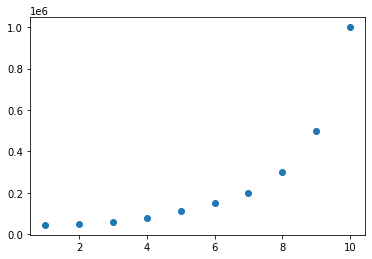

In [59]:
plt.scatter(x,y)

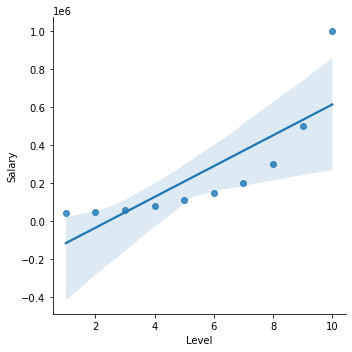

In [56]:
sb.lmplot(x='Level',y='Salary',data=ds)

In [60]:
model.fit(x,y)

LinearRegression()

In [66]:
y_predict=model.predict([[6.5]])

In [68]:
y_predict
#Error is Very High

array([[330378.78787879]])

In [70]:
from sklearn.preprocessing import PolynomialFeatures

In [96]:
poly=PolynomialFeatures(degree=3)

In [97]:
x_poly=poly.fit_transform(x)

In [98]:
reg2=LinearRegression()

In [99]:
reg2.fit(x_poly,y)

LinearRegression()

In [101]:
reg2.predict(poly.fit_transform([[6.5]]))

array([[133259.46969698]])

In [102]:
y_pred = reg2.predict(x_poly)

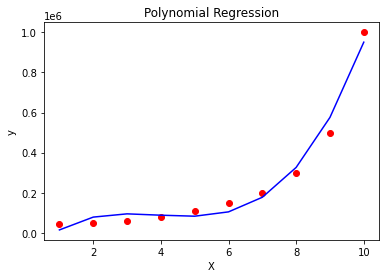

In [103]:
plt.scatter(x, y, color='red')
plt.plot(x, y_pred, color='blue')
plt.title('Polynomial Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.show()